In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interval = 900

In [3]:
df = pd.read_csv("./data/rideshare_kaggle.csv")
df = df.sort_values("timestamp")
df["datetime"] = pd.to_datetime(df.timestamp, unit="s")

In [4]:
freq_df =  df.set_index("datetime").cab_type.resample(f"{interval}s").count().to_frame()
freq_df = freq_df.rename(columns={"cab_type": "freq"})
freq_df = freq_df.reset_index()
freq_df["timestamp"] = freq_df["datetime"].apply(lambda x: x.timestamp()) + interval

In [5]:
tmp = pd.concat([df.set_index("datetime"), freq_df])
tmp = tmp.sort_values("timestamp")
tmp.freq = tmp.freq.backfill()

In [6]:
df = tmp[~tmp.destination.isna()]
df.freq = df.freq.astype(int)

/var/folders/mn/c927xx4d4y7d1tdd5v7gd92c0000gn/T/ipykernel_53972/3573311584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.freq = df.freq.astype(int)


In [7]:
df = df.rename(columns={"freq": f"number_of_orders_within_{int(interval/60)}_mins"})
freq_df = freq_df.rename(columns={"freq": f"number_of_orders_within_{int(interval/60)}_mins"})

In [8]:
sampled_df = df.sample(50000)
sampled_df.to_csv("./data/sampled_rideshare.csv")

In [9]:
freq_df.to_csv("./data/rides_slide_window.csv")

In [10]:
df["busy"] = np.where(df.number_of_orders_within_15_mins < 500, "not busy", 
                      np.where(df.number_of_orders_within_15_mins < 1000, "normal", "busy"))

In [11]:
df[["price", "busy"]].groupby("busy").price.mean()

busy
busy        16.537197
normal      16.574187
not busy    16.540966
Name: price, dtype: float64

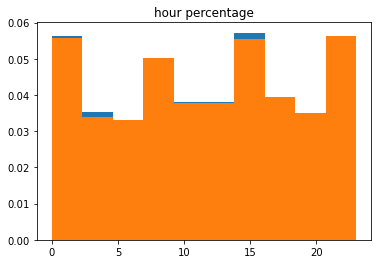

In [12]:
plt.title("hour percentage")
plt.hist(df.hour, density=True)
plt.hist(sampled_df.hour, density=True)
plt.savefig("hour_percentage.jpg")

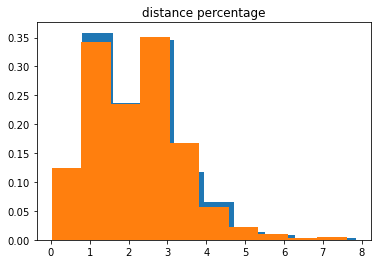

In [13]:
plt.title("distance percentage")
plt.hist(df.distance, density=True)
plt.hist(sampled_df.distance, density=True)
plt.savefig("distance_percentage.jpg")

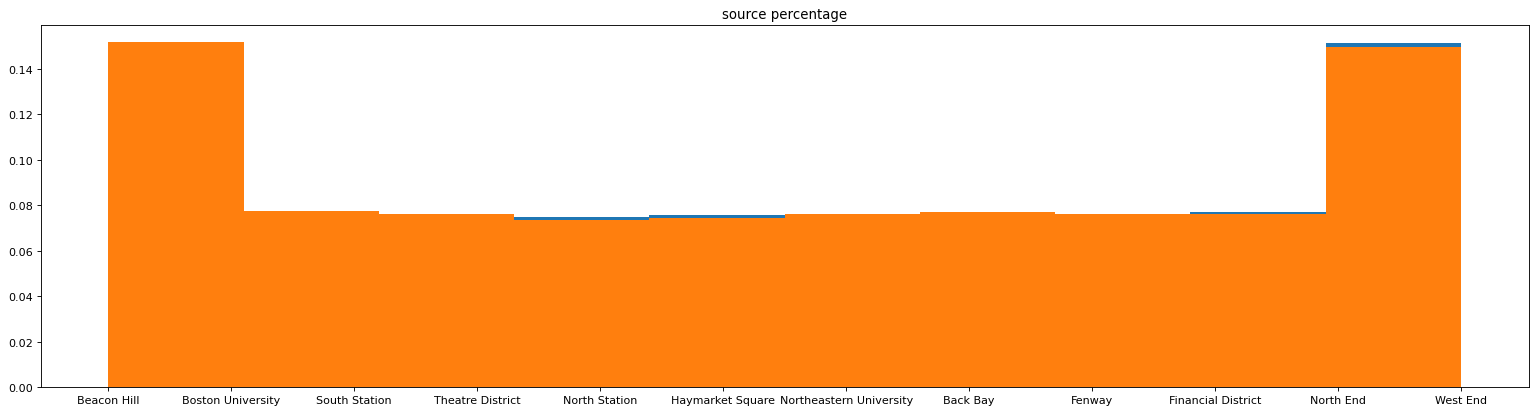

In [19]:
from matplotlib.pyplot import figure

figure(figsize=(24, 6), dpi=80)

plt.title("source percentage")
plt.hist(df.source, density=True)
plt.hist(sampled_df.source, density=True)
plt.savefig("source_percentage.jpg")

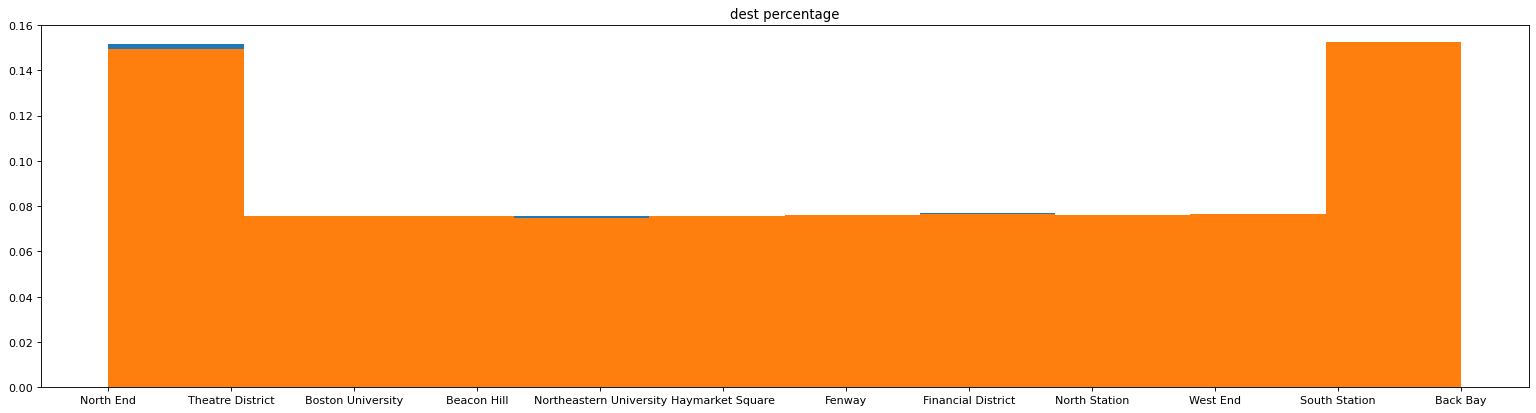

In [20]:
figure(figsize=(24, 6), dpi=80)

plt.title("dest percentage")
plt.hist(df.destination, density=True)
plt.hist(sampled_df.destination, density=True)
plt.savefig("dest_percentage.jpg")

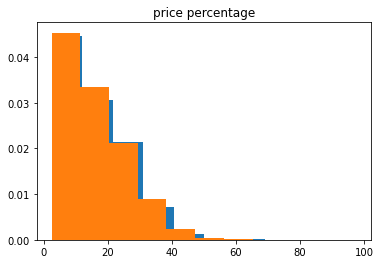

In [16]:
plt.title("price percentage")
plt.hist(df.price, density=True)
plt.hist(sampled_df.price, density=True)
plt.savefig("price_percentage.jpg")

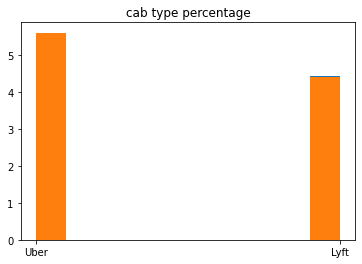

In [17]:
plt.title("cab type percentage")
plt.hist(df.cab_type, density=True)
plt.hist(sampled_df.cab_type, density=True)
plt.savefig("cab_type_percentage.jpg")